In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('final_data_v0-2.csv',  dtype = str)

In [3]:
data.head()

,PBMVendor,PharmacyID,DrugShortName,UnitCost,PharmacyName,PharmacyStreetAddress1,PharmacyCity,PharmacyZip,PharmZip,DrugLabelName
0,MedImpact,59ROCKINGHAMST03038,HYDROCHLOROTHIAZIDE,0.3333333333333333,RITE AID PHARMACY 03310,59 ROCKINGHAM ST,DERRY ...,03038,030,HYDROCHLOROTHIAZIDE
1,MedImpact,718SMYTHRD03104,GABAPENTIN,0.20355555555555555,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,GABAPENTIN
2,MedImpact,718SMYTHRD03104,SANTYL,0.9538333333333333,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,SANTYL
3,MedImpact,718SMYTHRD03104,TORSEMIDE,0.6331666666666667,MANCHESTER VAMC PHARMACY,718 SMYTH RD,MANCHESTER ...,03104,031,TORSEMIDE
4,MedImpact,288SANDOWNRD03826,OMEPRAZOLE,0.3716666666666667,WALGREENS,288 SANDOWN RD,HAMPSTEAD ...,03826,038,OMEPRAZOLE


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283162 entries, 0 to 3283161
Data columns (total 10 columns):
PBMVendor                 object
PharmacyID                object
DrugShortName             object
UnitCost                  object
PharmacyName              object
PharmacyStreetAddress1    object
PharmacyCity              object
PharmacyZip               object
PharmZip                  object
DrugLabelName             object
dtypes: object(10)
memory usage: 250.5+ MB


In [5]:
# convert 'UnitCost' to floating number
data['UnitCost'] = data['UnitCost'].astype(float)

In [6]:
# clean the white space to Pharmacy City
data['PharmacyCity'] = data['PharmacyCity'].str.strip()

In [7]:
data['PharmacyCity'].head()

0         DERRY
1    MANCHESTER
2    MANCHESTER
3    MANCHESTER
4     HAMPSTEAD
Name: PharmacyCity, dtype: object

In [8]:
# check if we still have any missing values in the dataset
data.isnull().any()

PBMVendor                 False
PharmacyID                False
DrugShortName             False
UnitCost                  False
PharmacyName              False
PharmacyStreetAddress1    False
PharmacyCity              False
PharmacyZip               False
PharmZip                  False
DrugLabelName             False
dtype: bool

## 1) Identify the cheapest pharmacy in each zip code for a given drug

## 2) Identify the cheapest PBM for a given drug

## 3) Identify the cheapest PBM Overall

In [9]:
# Number of observations in each 'DrugLabelName','PharmacyZip','PharmacyName'
data.groupby(['DrugLabelName','PharmacyZip','PharmacyName']).size()

DrugLabelName              PharmacyZip  PharmacyName             
10ML LL SYRN MIS 20GX1"    02114        MASS GENERAL HOSP O/P PH      1
1ML MEDSAVER SYRINGE/REGU  01569        CVS PHARMACY                  2
1ML SYRINGE MIS 28GX1/2"   01569        CVS PHARMACY 00946            2
                           03053        CVS PHARMACY 02420            3
                           03062        MEDICINE WORLD INC            5
                           03868        RITE AID PHARMACY 10300       2
1ML TB SYRNG MIS 25GX5/8"  01923        CVS PHARMACY 02959            1
                           03055        WALGREENS 10462               1
                           03063        WALGREENS 09447              29
                           03106        CVS PHARMACY 00442            5
                           03861        WALGREENS 10642               1
                           04106        CVS PHARMACY 00806            1
                           04901        RITE AID PHARMACY 4143        

In [59]:
# Identify the cheapest pharmacy in each zip code for a given drug
cheapest_pharmacy_byZip = data.groupby(['DrugLabelName','PharmacyZip','PharmacyName']).agg({'UnitCost': ['min']})

In [60]:
cheapest_pharmacy_byZip

UnitCost
                                                                        min
DrugLabelName             PharmacyZip PharmacyName                         
10ML LL SYRN MIS 20GX1"   02114       MASS GENERAL HOSP O/P PH     0.257500
1ML MEDSAVER SYRINGE/REGU 01569       CVS PHARMACY                 0.208333
1ML SYRINGE MIS 28GX1/2"  01569       CVS PHARMACY 00946           0.234000
                          03053       CVS PHARMACY 02420           0.184200
                          03062       MEDICINE WORLD INC           0.272000
                          03868       RITE AID PHARMACY 10300      0.418333
1ML TB SYRNG MIS 25GX5/8" 01923       CVS PHARMACY 02959           0.176333
                          03055       WALGREENS 10462              0.427500
                          03063       WALGREENS 09447              0.245000
                          03106       CVS PHARMACY 00442           0.247500
                          03861       WALGREENS 10642              0.181000
                          04106       CVS PHARMACY 00806           0.191905
                          04901       RITE AID PHARMACY 4143       0.281667
                          04910       CENTRAL MAINE PHARMACY       0.205000
                          25303       KROGER PHARMACY 29769        0.497500
                          46383       WALGREENS 05241              0.656667
                          53142       PICK N SAVE PHARMACY 6874    0.281667
1ML TB SYRNG MIS 26GX3/8" 03784       PRICE CHOPPER PHARMAC 167    0.274167
1ML TB SYRNG MIS 27GX1/2" 01537       WALMART PHARMACY 10-2012     0.310000
                          03110       CVS PHARMACY 00741           0.236667
                          03868       RITE AID PHARMACY 10300      0.185000
                          04530       WALGREENS 10077              0.274167
1ML TB SYRNG MIS REG LUER 29102       CVS PHARMACY 03597           0.119200
2-DEOXY-D-GLUCOSE         03060       WINGATE'S PHARMACY          98.000000
3ML LL SYRNG MIS 18GX1.5" 01569       CVS PHARMACY 00946           0.168333
                          02451       VILLAGE FERTILITY PHARMA     0.362000
                          03222       RITE AID PHARMACY 4166       0.130000
                          04101       APOTHECARY BY DESIGN LLC     0.187000
                                      CVS PHARMACY 00374           0.177500
                          04102       CVS PHARMACY 00804           0.162333
...                                                                     ...
ZYTIGA TAB 250MG          03077       RITE AID PHARMACY 3288      62.344667
ZYVOX                     02114       MGH OUTPATIENT PHARMACY    140.532143
                          02118       CVS #01252                 143.077800
                          02215       PHARMACARE SPECIALTY #029  182.638929
                                      WALGREENS #10996           168.194500
                          03848       RITE AID PHARMACY 01397    119.002000
                          05819       NORTHEASTERN VT REG HOSP   112.716429
ZYVOX SUS 100MG/5M        03756       DARTMOUTH-HITCHCOCK PHCY     3.784978
                          03784       HANNAFORD SUPERMRKT 8266     4.590311
ZYVOX TAB 600MG           01833       CVS PHARMACY 02177         138.820000
                          01851       WALGREENS 06739            155.362833
                          02114       MASS GENERAL HOSP O/P PH   138.820000
                          02151       WALGREENS 10824            155.504444
                          02190       WALGREENS 09405            174.144444
                          02382       CVS PHARMACY 00635         136.461429
                          03054       CVS PHARMACY 00902         113.415714
                          03246       THE PHARMACY CENTER        117.572857
                          03257       COLONIAL PHARMACY-NEW LO   113.397000
                          03301       CVS PHARMACY 07122         137.544500
                          03431       C

In [61]:
# covert to dataframe
cheapest_pharmacy_byZip = cheapest_pharmacy_byZip.reset_index()
cheapest_pharmacy_byZip

,DrugLabelName,PharmacyZip,PharmacyName,UnitCost
,,,,min
0,"10ML LL SYRN MIS 20GX1""",02114,MASS GENERAL HOSP O/P PH,0.257500
1,1ML MEDSAVER SYRINGE/REGU,01569,CVS PHARMACY,0.208333
2,"1ML SYRINGE MIS 28GX1/2""",01569,CVS PHARMACY 00946,0.234000
3,"1ML SYRINGE MIS 28GX1/2""",03053,CVS PHARMACY 02420,0.184200
4,"1ML SYRINGE MIS 28GX1/2""",03062,MEDICINE WORLD INC,0.272000
5,"1ML SYRINGE MIS 28GX1/2""",03868,RITE AID PHARMACY 10300,0.418333
6,"1ML TB SYRNG MIS 25GX5/8""",01923,CVS PHARMACY 02959,0.176333
7,"1ML TB SYRNG MIS 25GX5/8""",03055,WALGREENS 10462,0.427500
8,"1ML TB SYRNG MIS 25GX5/8""",03063,WALGREENS 09447,0.245000


In [20]:
# only visulizae one drug '1ML SYRINGE MIS 28GX1/2"'
cheapest_pharmacy_SYRINGE = cheapest_pharmacy_byZip.loc[cheapest_pharmacy_byZip['DrugLabelName'] == '1ML SYRINGE MIS 28GX1/2"']

In [21]:
cheapest_pharmacy_SYRINGE

,DrugLabelName,PharmacyZip,PharmacyName,UnitCost
,,,,min
2,"1ML SYRINGE MIS 28GX1/2""",01569,CVS PHARMACY 00946,0.234000
3,"1ML SYRINGE MIS 28GX1/2""",03053,CVS PHARMACY 02420,0.184200
4,"1ML SYRINGE MIS 28GX1/2""",03062,MEDICINE WORLD INC,0.272000
5,"1ML SYRINGE MIS 28GX1/2""",03868,RITE AID PHARMACY 10300,0.418333


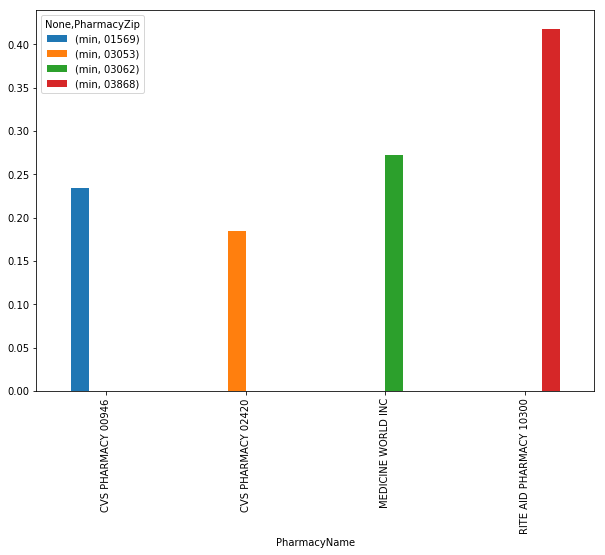

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
cheapest_pharmacy_SYRINGE.groupby(['PharmacyName','PharmacyZip']).min()['UnitCost'].unstack().plot(kind = 'bar', ax=ax)

### 2) Identify the cheapest PBM for a given drug

In [50]:
# Number of observations in each 'DrugLabelName','PBMVendor'
data.groupby(['DrugLabelName','PBMVendor']).size()

DrugLabelName              PBMVendor 
10ML LL SYRN MIS 20GX1"    CVSPAL4000     1
1ML MEDSAVER SYRINGE/REGU  CVSPAL4000     2
1ML SYRINGE MIS 28GX1/2"   CVSPAL4000    12
1ML TB SYRNG MIS 25GX5/8"  CVSPAL4000    48
1ML TB SYRNG MIS 26GX3/8"  CVSPAL4000    10
1ML TB SYRNG MIS 27GX1/2"  CVSPAL4000    17
1ML TB SYRNG MIS REG LUER  CVSPAL4000     1
2-DEOXY-D-GLUCOSE          MedImpact      1
3ML LL SYRNG MIS 18GX1.5"  CVSPAL4000    28
3ML LL SYRNG MIS 20GX1.5"  CVSPAL4000     4
3ML LL SYRNG MIS 21GX1"    CVSPAL4000    18
3ML LL SYRNG MIS 21GX1.5"  CVSPAL4000    37
3ML LL SYRNG MIS 22GX1"    CVSPAL4000    40
3ML LL SYRNG MIS 22GX1.5"  CVSPAL4000    35
3ML LL SYRNG MIS 23GX1"    CVSPAL4000    44
3ML LL SYRNG MIS 23GX1.5"  CVSPAL4000    18
3ML LL SYRNG MIS 25GX1"    CVSPAL4000    60
3ML LL SYRNG MIS 25GX1.5"  CVSPAL4000    30
3ML LL SYRNG MIS 25GX5/8"  CVSPAL4000    12
3ML SYRINGE MIS 21GX1"     CVSPAL4000     1
3ML SYRINGE MIS 22GX1.5"   CVSPAL4000     7
3ML SYRINGE MIS 23GX1"     CVSPAL4000 

In [51]:
# Identify the cheapest PBM for a given drug
chepeastPBM_byDrug = data.groupby(['DrugLabelName','PBMVendor']).agg({'UnitCost': ['min']})

In [52]:
chepeastPBM_byDrug

,,UnitCost
,,min
DrugLabelName,PBMVendor,
"10ML LL SYRN MIS 20GX1""",CVSPAL4000,0.257500
1ML MEDSAVER SYRINGE/REGU,CVSPAL4000,0.208333
"1ML SYRINGE MIS 28GX1/2""",CVSPAL4000,0.184200
"1ML TB SYRNG MIS 25GX5/8""",CVSPAL4000,0.176333
"1ML TB SYRNG MIS 26GX3/8""",CVSPAL4000,0.274167
"1ML TB SYRNG MIS 27GX1/2""",CVSPAL4000,0.185000
1ML TB SYRNG MIS REG LUER,CVSPAL4000,0.119200
2-DEOXY-D-GLUCOSE,MedImpact,98.000000


In [43]:
# covert to dataframe
chepeastPBM_byDrug = chepeastPBM_byDrug.reset_index()

In [31]:
# only visulizae one drug 'ZYLET"'
chepeastPBM_byDrug_ZYLET = chepeastPBM_byDrug.loc[chepeastPBM_byDrug['DrugLabelName'] == 'ZYLET']

In [32]:
chepeastPBM_byDrug_ZYLET

,DrugLabelName,PBMVendor,UnitCost
,,,min
11762,ZYLET,CVSPAL4000,39.624
11763,ZYLET,MedImpact,22.092
11764,ZYLET,Medco,37.596


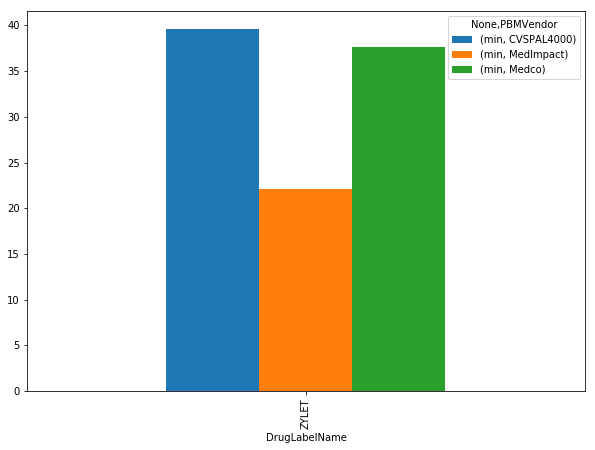

In [66]:
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
chepeastPBM_byDrug_ZYLET.groupby(['DrugLabelName','PBMVendor']).min()['UnitCost'].unstack().plot(kind = 'bar', ax=ax)

In [67]:
# 3) Identify the cheapest PBM Overall
cheapestPBM = data.groupby('PBMVendor')['UnitCost'].agg({'UnitCost': ['mean']})

In [68]:
cheapestPBM

,UnitCost
,mean
PBMVendor,
CVSPAL4000,14.341486
MedImpact,10.427048
Medco,10.401937
National,5.080631
Welldyne,31.193835


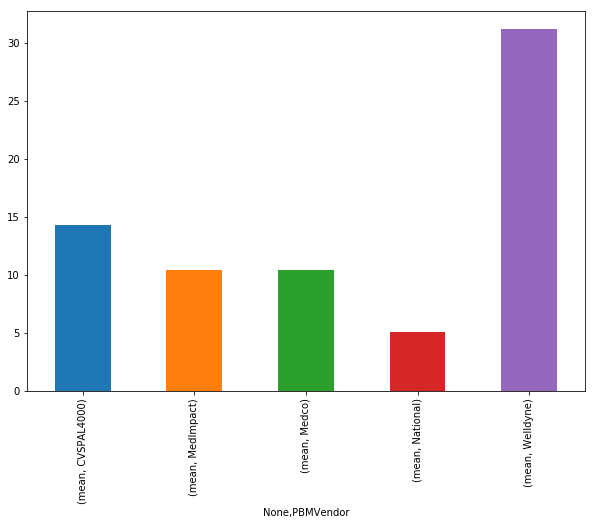

In [72]:
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
cheapestPBM.groupby('PBMVendor').mean()['UnitCost'].unstack().plot(kind='bar',ax=ax)